In [1]:
from Neuron import *
from Layers import *
from trainers import *
from data_preps import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Label = 7, index = 6


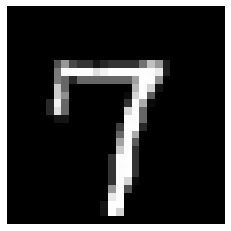

In [2]:
data_X, data_y = visualize_image()

train_data, test_data = data_preparation(data_X, data_y)

[0,1,3,6,7,8,10,11,16,21]

In [18]:
num_epochs = 2
pics = range(1000)
lr = .07
alpha = 2
g = .7
out_layer = Output_layer(num_exc=10, learning_rate = lr, assymetry=alpha)
in_layer = Input_layer(out_layer, num_exc=28*28, learning_rate=lr, g=g, assymetry=alpha, update_weights=True)
in_layer.make_connections()

In [19]:
in_layer.load_weights(filename='model_checkpoints/checkpoint_input.csv')

In [20]:
for iter in range(num_epochs):
    for p in pics:
        signal = train_data[p][0] * .06
        target = train_data[p][1]
        two_layers_trainer(signal, in_layer,  out_layer, target, power=9, time=30, recovery_time=30)
    print(f'epoch {iter} completed!')

KeyboardInterrupt: 

In [13]:
in_layer.save_weights()

In [22]:
in_layer.weight_dynamics(turn_on=False)
out_layer.drop_impulse()
gts = []
preds = []
pics = [0,1,3,6,7,8,10,11,16,21]
for i in pics:
    for j in range(30):
        in_layer.drop_impulse()
        in_layer.transmit_current()
        out_layer.drop_impulse()
        _ = out_layer.simulation()
    signal = train_data[i][0]
    gt = train_data[i][1]
    pred = prediction(signal, [in_layer, out_layer], duration=130, build_plots=False)
    gts.append(gt)
    preds.append(pred)
gts = np.array(gts)
preds = np.array(preds)
print(f'Ground truth: {gts}')
print(f'Predictions: {preds}')
correct_samples = np.sum(preds == gts)
accuracy = correct_samples / 10
print(accuracy)

Ground truth: [1 0 4 7 3 5 8 9 2 6]
Predictions: [2 0 2 7 9 4 0 2 2 0]
0.3
